In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("C:/Users/georg/Documents/JHU/Theory of ML/Group Project/sp500_headlines_2008_2024.csv")

In [ ]:
nltk.download('punkt_tab')

# Tokenize the titles
sentences = data['Title'].apply(word_tokenize).tolist()

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Example analysis: find most similar words to 'neural'
similar_words = model.wv.most_similar('stock', topn=5)

similar_words

In [ ]:
# Tokenize and tag the titles
documents = [TaggedDocument(words=word_tokenize(title.lower()), tags=[str(i)]) for i, title in enumerate(data['Title'])]

# Train Doc2Vec model
model = Doc2Vec(documents, vector_size=100, window=5, min_count=1, workers=4, epochs=20)

In [ ]:
data['Title_Vector'] = data.index.map(lambda i: model.dv[str(i)])

In [ ]:
print(data.head)

In [47]:
import plotly.io as pio
pio.renderers.default = 'iframe' 

In [52]:
titles = list(data["Title"])
vectors = list(data["Title_Vector"])

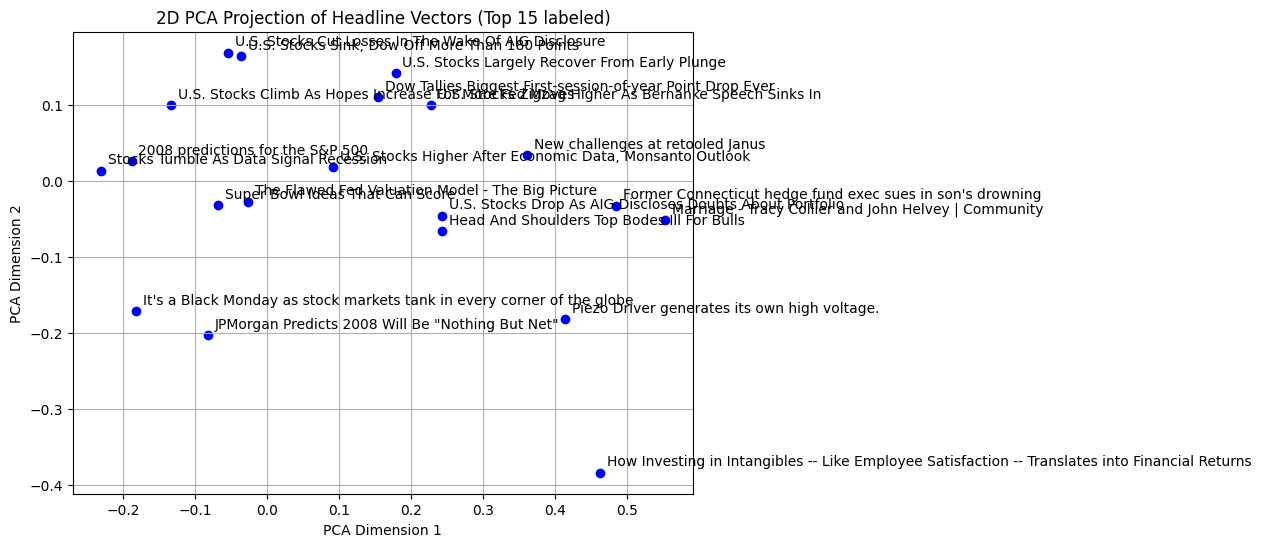

In [60]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

def escape_special_chars(s):
    return s.replace('$', r'\$')

# Filter titles and vectors by ASCII only (no escaping here)
filtered_data = [(title, vec) for title, vec in zip(titles, vectors_2d) if is_ascii(title)]

# Separate filtered titles and vectors
filtered_titles = [t for t, v in filtered_data[0:20]]
filtered_vectors = [v for t, v in filtered_data[0:20]]

# Convert filtered_vectors to NumPy array for plotting
import numpy as np
filtered_vectors = np.array(filtered_vectors)

# Plot filtered data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_vectors[:, 0], filtered_vectors[:, 1], color='blue')

# Generate egend
for i, title in enumerate(filtered_titles):
    safe_title = escape_special_chars(title)
    plt.annotate(safe_title, (filtered_vectors[i, 0], filtered_vectors[i, 1]), 
                 textcoords="offset points", xytext=(5,5), ha='left')

plt.title('2D PCA Projection of Headline Vectors (Top 15 labeled)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.grid(True)
plt.show()

In [61]:
# Create a new DataFrame from the list of vectors
vectors_df = pd.DataFrame(data["Title_Vector"].tolist(),
                          columns=[f'doc2vec_{i+1}' for i in range(100)])

# Concatenate with the original DataFrame
data_expanded = pd.concat([data, vectors_df], axis=1)

In [62]:
print(data_expanded.head)

<bound method NDFrame.head of                                                    Title        Date       CP  \
0       JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16   
1      Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16   
2                       2008 predictions for the S&P 500  2008-01-02  1447.16   
3      U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16   
4      U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   
...                                                  ...         ...      ...   
19122          REITs vs. Stocks: What Does the Data Say?  2024-03-04  5130.95   
19123  Nasdaq Index, Dow Jones, S&P 500 News: Futures...  2024-03-04  5130.95   
19124  Nasdaq 100, Dow Jones, S&P 500 News: Cautious ...  2024-03-04  5130.95   
19125  Bank of America boosts S&P 500 target to 5,400...  2024-03-04  5130.95   
19126  S&P 500 Gains and Losses Today: Tesla Shares T...  2024-03-04  5130.95  